# EEA Air Quality Datasets
The European Environment Agency (EEA) provides air quality data from EU countries through an [API](https://eeadmz1-downloads-api-appservice.azurewebsites.net/swagger/index.html) or through a [web page](https://eeadmz1-downloads-webapp.azurewebsites.net/) (Air Quality Download Service) where the datasets can be downloaded. The data is available in the [Apache Parquet](https://arrow.apache.org/docs/python/parquet.html) format.

In [9]:
import pyarrow.parquet as pq
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from osgeo import gdal, osr, ogr
import geopandas as gpd
from shapely.geometry import Point
import contextily as cx
import warnings
warnings.filterwarnings('ignore')
from platform import python_version
print("Python version: %s"%python_version())
print("NumPy version: %s"%np.__version__)
print("Pandas version: %s"%pd.__version__)
print('GDAL version: %s'%gdal.__version__)
print("GeoPandas version: %s"%gpd.__version__)

Python version: 3.11.5
NumPy version: 1.25.2
Pandas version: 2.1.1
GDAL version: 3.7.2
GeoPandas version: 0.14.0


## PM10, Oulu (FI)
We download a dataset about PM10 for the Oulu station, in Finland, from the EEA website using the UI. In the UI we set "FI" for countries, "Oulu" for Cities, "PM10" for pollutants, and "Up to date" for the datasets. The dataset is provided as a file in the Apache Parquet format. The filename contains the station ID (FI00301_00005_100, accordining to the FMI)    

In [17]:
fi_oulu_pm10 = 'data/eea/SPO-FI00301_00005_100.parquet'
fi_oulu_pm10_tmp_df = pq.read_table(fi_oulu_pm10).to_pandas()
fi_oulu_pm10_tmp_df.shape

(11795, 12)

In [18]:
fi_oulu_pm10_tmp_df.head()

,Samplingpoint,Pollutant,Start,End,Value,Unit,AggType,Validity,Verification,ResultTime,DataCapture,FkObservationLog
0,FI/SPO-FI00301_00005_100,5,2022-12-31 23:00:00,2023-01-01 00:00:00,8.494222000000000000,ug/m3,hour,1,3,2023-01-02 00:30:03,None,c7b07300-c9d3-4900-97d4-5f48cdd8e45d
1,FI/SPO-FI00301_00005_100,5,2023-01-01 00:00:00,2023-01-01 01:00:00,4.464811000000000000,ug/m3,hour,1,3,2023-01-02 01:30:03,None,56f3421c-a27f-4ec2-9db8-378fcda0c510
2,FI/SPO-FI00301_00005_100,5,2023-01-01 01:00:00,2023-01-01 02:00:00,4.544486000000000000,ug/m3,hour,1,3,2023-01-02 02:30:03,None,fdbcd04d-e7f7-4f19-98d8-634452cdc88c
3,FI/SPO-FI00301_00005_100,5,2023-01-01 02:00:00,2023-01-01 03:00:00,4.221636000000000000,ug/m3,hour,1,3,2023-01-02 03:30:04,None,b7766798-b7e0-4fc7-a3fa-0dcc5aa6dcdb
4,FI/SPO-FI00301_00005_100,5,2023-01-01 03:00:00,2023-01-01 04:00:00,3.908483000000000000,ug/m3,hour,1,3,2023-01-02 04:30:03,None,2ed8a8c8-4c6f-43f6-ab9a-b9820a22fa54


In [20]:
fi_oulu_pm10_tmp_df.tail()

,Samplingpoint,Pollutant,Start,End,Value,Unit,AggType,Validity,Verification,ResultTime,DataCapture,FkObservationLog
11790,FI/SPO-FI00301_00005_100,5,2024-05-06 06:00:00,2024-05-06 07:00:00,16.023013000000000000,ug.m-3,hour,1,3,2024-05-06 11:30:03,None,a95f067b-6279-4da6-8454-5313802d2d95
11791,FI/SPO-FI00301_00005_100,5,2024-05-06 07:00:00,2024-05-06 08:00:00,19.072442000000000000,ug.m-3,hour,1,3,2024-05-06 08:30:04,None,cf5d9dbd-6862-4d52-8ab6-a11e9d7aa46f
11792,FI/SPO-FI00301_00005_100,5,2024-05-06 08:00:00,2024-05-06 09:00:00,14.245591000000000000,ug.m-3,hour,1,3,2024-05-06 11:30:03,None,a95f067b-6279-4da6-8454-5313802d2d95
11793,FI/SPO-FI00301_00005_100,5,2024-05-06 09:00:00,2024-05-06 10:00:00,10.120997000000000000,ug.m-3,hour,1,3,2024-05-06 11:30:03,None,a95f067b-6279-4da6-8454-5313802d2d95
11794,FI/SPO-FI00301_00005_100,5,2024-05-06 10:00:00,2024-05-06 11:00:00,12.066708000000000000,ug.m-3,hour,1,3,2024-05-06 11:30:03,None,a95f067b-6279-4da6-8454-5313802d2d95


In [37]:
fi_oulu_pm10_tmp_df.drop(['Samplingpoint', 
                          'Pollutant',
                          'Start', 
                          'Unit',
                          'AggType', 
                          'Validity', 
                          'Verification', 
                          'ResultTime', 
                          'DataCapture', 
                          'FkObservationLog'], axis=1, inplace=True)

In [38]:
fi_oulu_pm10_tmp_df.rename(columns={'Value':'PM10 [µg/m3]', 'End':'DateTime'}, inplace=True)

In [39]:
fi_oulu_pm10_tmp_df[fi_oulu_pm10_df['PM10 [µg/m3]'].isna() == True]
#print(nan_df.any())

,DateTime,PM10 [µg/m3]
1079,2023-02-14 23:00:00,None
2018,2023-03-26 02:00:00,None
6008,2023-09-08 08:00:00,None
6009,2023-09-08 09:00:00,None
6010,2023-09-08 10:00:00,None


In [51]:
fi_oulu_pm10_tmp_df.dropna(inplace=True)

In [40]:
date_index = pd.to_datetime(fi_oulu_pm10_tmp_df['DateTime'])
fi_oulu_pm10_tmp_df.drop(['DateTime'], axis=1, inplace=True)
fi_oulu_pm10_df = fi_oulu_pm10_tmp_df.set_index(date_index)

In [49]:
fi_oulu_pm10_df['PM10 [µg/m3]'][0]

Decimal('8.494222000000000000')

In [53]:
fi_oulu_pm10_df.dropna(inplace=True) #we have to remove the NaN values before resampling

In [55]:
fi_oulu_pm10_days_df = round(fi_oulu_pm10_df.resample('D').mean(), 1)
fi_oulu_pm10_days_df

,PM10 [µg/m3]
DateTime,
2023-01-01,5.286964
2023-01-02,9.760145
2023-01-03,6.341196
2023-01-04,5.903058
2023-01-05,5.847499
...,...
2024-05-02,26.584463
2024-05-03,21.740682
2024-05-04,13.028461


In [58]:
month_index = pd.date_range('2023-01-01', '2024-05-06', freq='M')

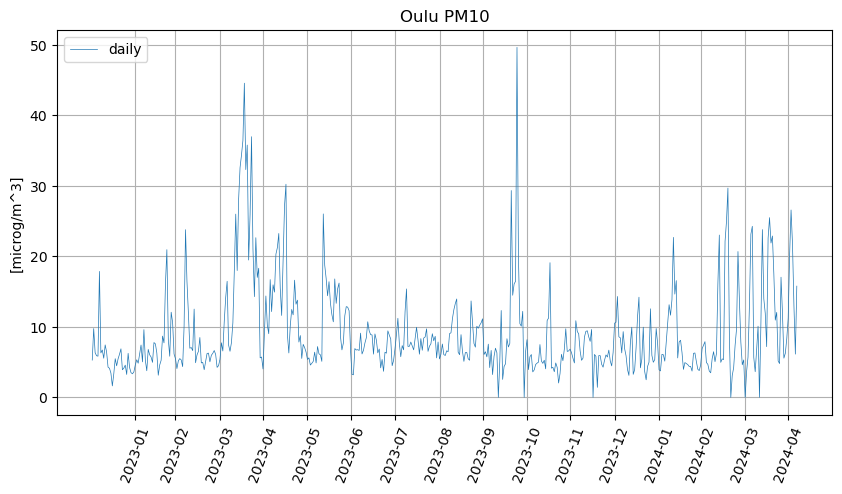

In [64]:
fig, ax = plt.subplots(figsize=(10,5))
ax.grid(True)
ax.set_title('Oulu PM10')
ax.set_ylabel('[microg/m^3]')
ax.set_xticks(month_index)
ax.set_xticklabels(month_index, rotation=70)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt_days = ax.plot(fi_oulu_pm10_days_df, linewidth=0.5, label='daily')
#plt_months = ax.plot(fi_oulu_pm10_days_df['PM10'], label='monthly')
plt.legend(loc='upper left')

We remove the negative values

In [62]:
fi_oulu_pm10_days_df[fi_oulu_pm10_days_df['PM10 [µg/m3]'] < 0.0] = 0.0

In [63]:
fi_oulu_pm10_days_df[fi_oulu_pm10_days_df['PM10 [µg/m3]'] < 0.0]

,PM10 [µg/m3]
DateTime,
